In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Udemy Courses.csv")
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


# 1. Data Cleaning

a. Checking the null values

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


... and it seems no null values

b. Checking the duplicate values

In [115]:
df.duplicated().sum() 

6

In [116]:
df[df.duplicated()]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
726,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.5 hours,2017-07-02T14:29:35Z,Business Finance
1186,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,37 mins,2016-05-16T18:28:30Z,Business Finance
1910,1157298,Introduction to Forex Trading Business For Beg...,True,20,0,0,27,Beginner Level,1.5 hours,2017-04-23T16:19:01Z,Business Finance
2431,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,Web Development
2597,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,37 mins,2014-04-15T21:48:55Z,Graphic Design
3516,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1 hour,2016-12-15T14:56:17Z,Business Finance


... it seems there are 6 duplicate values. So, we want to drop them.

In [125]:
df = df.drop_duplicates()
df[df.duplicated()]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


# 2. What Subject that Have Most Subscribers? 

In [118]:
df.subject.value_counts()

Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

Text(53.875, 0.5, 'Subscribers')

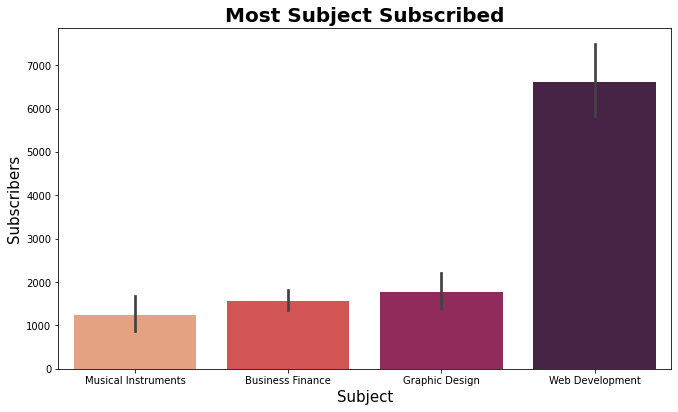

In [124]:
fig, ax = plt.subplots(figsize=(10,6))

bar = sns.barplot(x = "subject",y="num_subscribers",data=df,
                ax=ax, palette = "rocket_r")

ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout(pad=3.0)
ax.set_title("Most Subject Subscribed", fontsize = 20, fontweight = "bold")
ax.set_xlabel("Subject", fontsize = 15)
ax.set_ylabel("Subscribers", fontsize = 15)


# 3. Which Course that Have Most Subscribers?

In [143]:
df.sort_values("num_subscribers", ascending = False).head(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development
1388,19421,Free Beginner Electric Guitar Lessons,False,Free,101154,1042,95,Beginner Level,4.5 hours,2012-06-15T17:00:33Z,Musical Instruments
3556,473160,Web Design for Web Developers: Build Beautiful...,False,Free,98867,6512,20,All Levels,3 hours,2015-04-13T18:29:47Z,Web Development
2233,94430,Learn Javascript & JQuery From Scratch,True,30,84897,2685,10,All Levels,2 hours,2013-10-10T15:19:29Z,Web Development
2886,130064,Practical PHP: Master the Basics and Code Dyna...,False,Free,83737,4598,45,All Levels,6.5 hours,2014-07-19T03:02:05Z,Web Development
2034,364426,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5 hours,2015-03-12T23:19:54Z,Web Development


Text(-155.375, 0.5, 'Course Title')

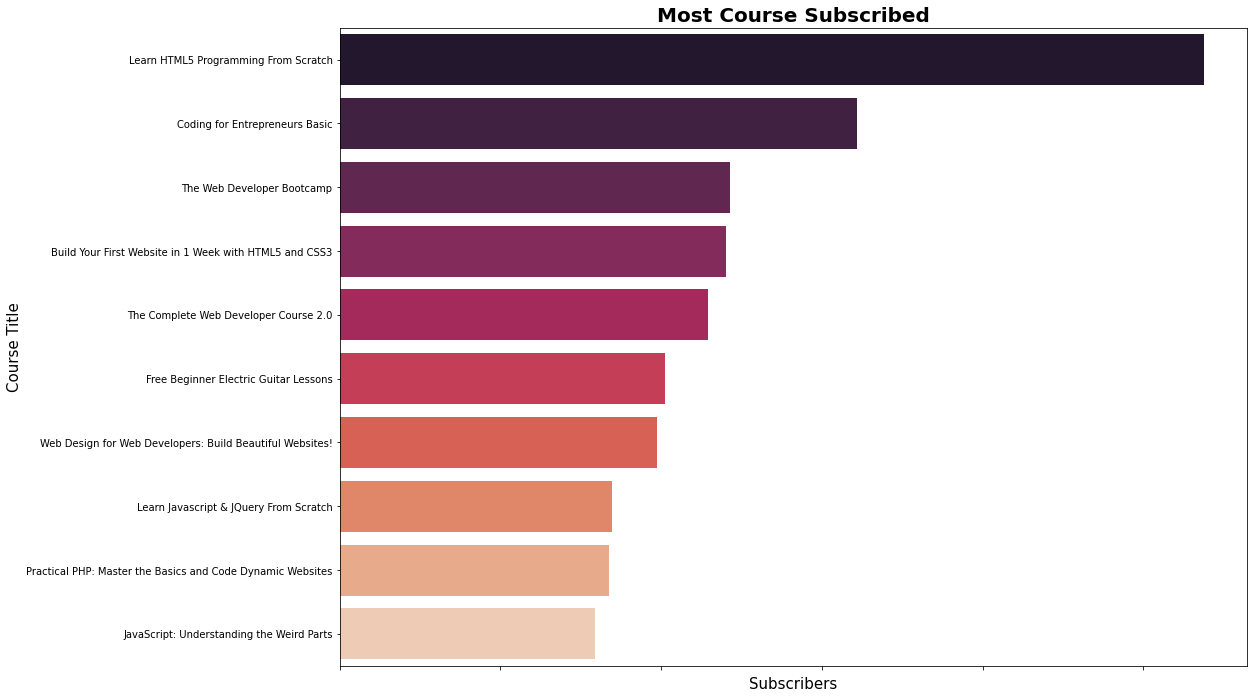

In [5]:
df1 = df.nlargest(n=10, columns=['num_subscribers'], keep='all')
fig, ax = plt.subplots(figsize=(18,10))

bar = sns.barplot(x = "num_subscribers",y="course_title",data=df1,
                ax=ax, palette = "rocket")

ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout(pad=3.0)
ax.set_title("Most Course Subscribed", fontsize = 20, fontweight = "bold")
ax.set_xlabel("Subscribers", fontsize = 15)
ax.set_ylabel("Course Title", fontsize = 15)


In [8]:
df["price"] = df["price"].replace(["Free"], 0)

In [9]:
df["price"] = df["price"].astype(str).astype(int)

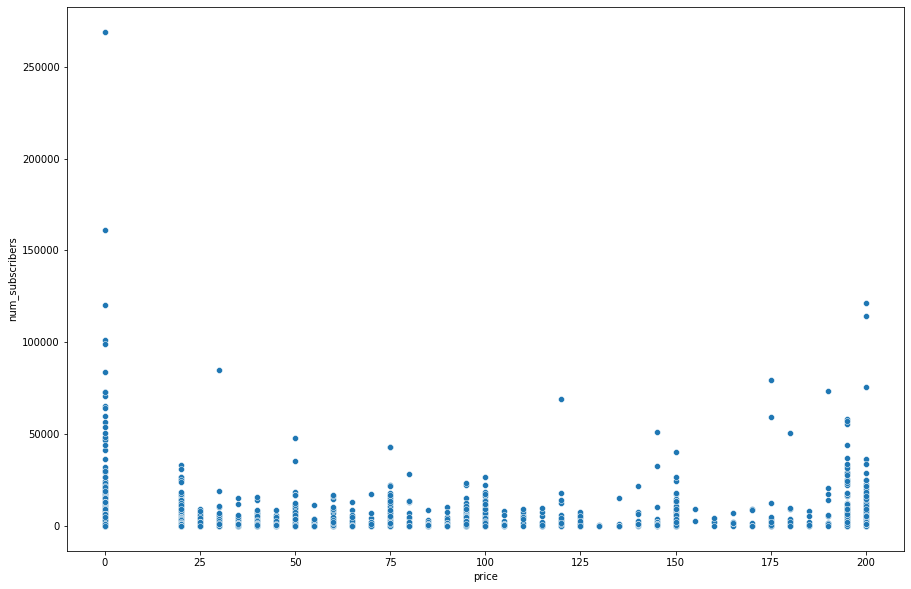

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(y = "num_subscribers",
                x = "price",
                data = df)
plt.show()

In [12]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])